In [4]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


**A. Perform histogram equalization of a gray scale image.**

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

In [21]:
path = "/content/gdrive/MyDrive/ComputerVision/guitar.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img

array([[ 98,  98,  98, ..., 144, 144, 141],
       [ 98,  98,  99, ..., 144, 144, 142],
       [ 99,  99,  99, ..., 145, 145, 143],
       ...,
       [ 38,  41,  45, ...,  41,  40,  36],
       [ 38,  41,  45, ...,  47,  47,  43],
       [ 38,  41,  45, ...,  53,  53,  50]], dtype=uint8)

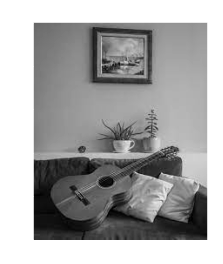

In [22]:
plt.imshow(img, cmap=plt.cm.gray)
plt.title("Original Image")
plt.show()

In [23]:
def plot_histo_image(img, title):
 hist,bins = np.histogram(img.flatten(),256,[0,256])
 cdf = hist.cumsum()
 cdf_normalized = cdf * float(hist.max()) / cdf.max()
 plt.plot(cdf_normalized, color = 'b')
 plt.hist(img.flatten(),256,[0,256], color = 'r')
 plt.xlim([0,256])
 plt.legend(('cdf','histogram'), loc = 'upper left')
 plt.title(title)
 plt.show()

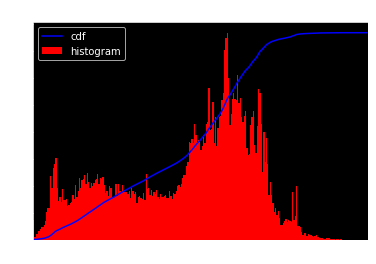

In [24]:
plot_histo_image(img, "Histogram Respresentation of Input Image")

In [25]:
eq = cv2.equalizeHist(img)
eq

array([[ 85,  85,  85, ..., 158, 158, 151],
       [ 85,  85,  85, ..., 158, 158, 153],
       [ 85,  85,  85, ..., 161, 161, 155],
       ...,
       [ 28,  31,  35, ...,  31,  30,  26],
       [ 28,  31,  35, ...,  38,  38,  33],
       [ 28,  31,  35, ...,  45,  45,  41]], dtype=uint8)

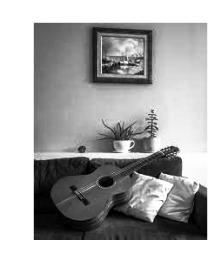

In [26]:
plt.imshow(eq, cmap=plt.cm.gray)
plt.title("Equalized Histogram Image")
plt.show()

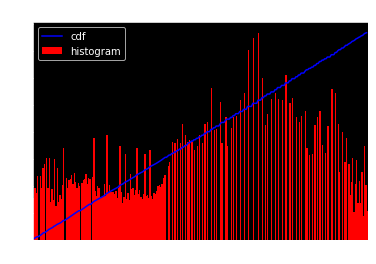

In [27]:
plot_histo_image(eq, "Equalized Histogram Respresntation of Input Image")

**B. Perform image smoothing using Gaussian filtering.**

In [17]:
path1 = "/content/gdrive/MyDrive/ComputerVision/flower.jpg"
src = cv2.imread(path1, cv2.IMREAD_UNCHANGED)

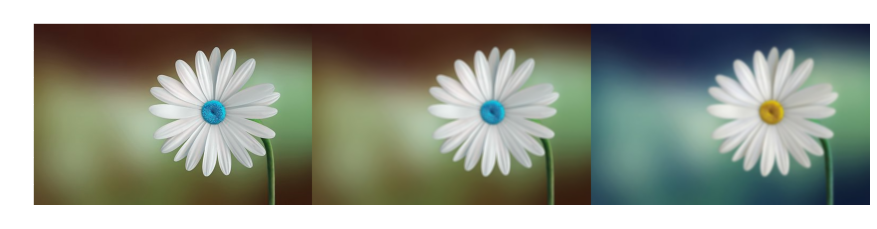

In [19]:
from PIL import Image, ImageFilter
# apply guassian blur on src image
dst = cv2.GaussianBlur(src, (5,5) ,cv2.BORDER_DEFAULT)
blurred_image = Image.open(path1)
blurred_image = blurred_image.filter(ImageFilter.GaussianBlur)
plt.figure(figsize = (15,15))
plt.imshow(np.hstack((src, dst, blurred_image)))
plt.title("Gaussian Smoothing")
plt.show()

**C. Apply median filtering to remove noise from given image. Week2_Q3_image.tif**

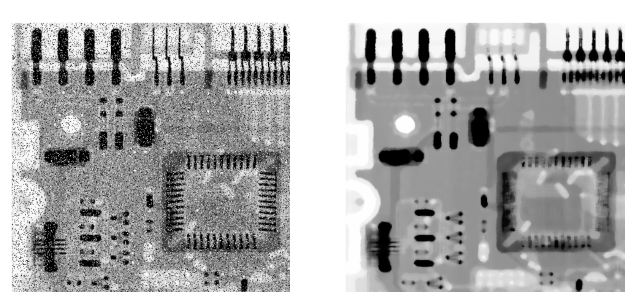

In [20]:
path2='/content/gdrive/MyDrive/ComputerVision/Week2_Q3_image.tif'
image = cv2.imread(path2)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
median_blur_image = cv2.medianBlur(image2, 9)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(median_blur_image, cmap='gray'),plt.title('MedianFilter')
plt.xticks([]), plt.yticks([])
plt.show()